In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("Setup Complete")


Setup Complete


In [2]:

webpage = requests.get("https://www.ft.com/content/691390ca-53d9-11ea-90ad-25e377c0ee1f")

soup = BeautifulSoup(webpage.content, "html.parser")

In [3]:
companyNames = []
countries = []
categories = []
absoluteGrowthRates = []
numberOfEmployees = []

for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    companyName = row.findAll('td')[1].get_text()
    companyNames.append(companyName)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    country = row.findAll('td')[4].get_text()
    countries.append(country)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    category = row.findAll('td')[5].get_text()
    categories.append(category)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    absoluteGrowthRate = row.findAll('td')[6].get_text().replace(",","")[:-1]
    absoluteGrowthRates.append(float(absoluteGrowthRate))
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    numberOfEmployee = row.findAll('td')[10].get_text()
    numberOfEmployees.append(float(numberOfEmployee if numberOfEmployee != 'n/a' else 'nan'))
    


In [4]:
companyDict = {"companyNames":companyNames, "countries": countries, "categories":categories, "absoluteGrowthRates": absoluteGrowthRates, "numberOfEmployees":numberOfEmployees}
companyRates_df = pd.DataFrame.from_dict(companyDict)  

In [5]:
companyRates_df.describe()

,absoluteGrowthRates,numberOfEmployees
count,999.000000,991.000000
mean,681.941742,92.281534
std,1175.891514,300.319827
min,164.500000,1.000000
25%,225.300000,14.000000
50%,341.700000,31.000000
75%,650.350000,80.000000
max,15641.900000,5534.000000


In [6]:
companyRates_df.countries.value_counts().nlargest(10)

Germany           191
Italy             190
United Kingdom    172
France            163
Spain              70
Poland             44
Finland            17
Sweden             16
Portugal           14
Czech Republic     13
Name: countries, dtype: int64

In [7]:
mean_vals = companyRates_df.groupby("countries").absoluteGrowthRates.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

countries
Estonia                   2361.387500
Finland                   1749.988235
Netherlands               1460.638462
Sweden                    1068.993750
Spain                      898.981429
Denmark                    844.400000
Bosnia and Herzegovina     818.800000
Portugal                   766.150000
United Kingdom             735.809302
Germany                    704.296335
Name: absoluteGrowthRates, dtype: float64


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


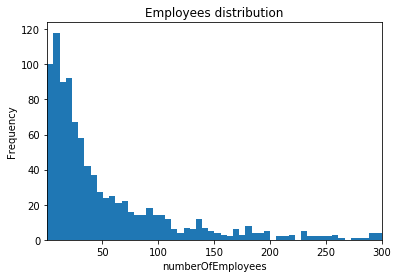

In [8]:
plt.hist(companyRates_df.numberOfEmployees, bins=1000)
plt.title("Employees distribution")
plt.xlabel("numberOfEmployees")
plt.ylabel("Frequency")
plt.xlim(1, 300)
plt.show()

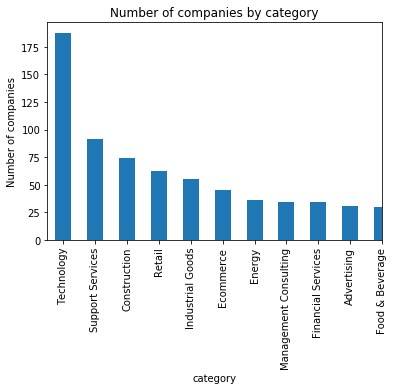

In [9]:
category_type = pd.value_counts(companyRates_df['categories'].values, sort=True)

ax = category_type.plot(kind='bar', title='Number of companies by category')
ax.set(xlabel='category', ylabel='Number of companies')
plt.xlim(right=10)
plt.show()

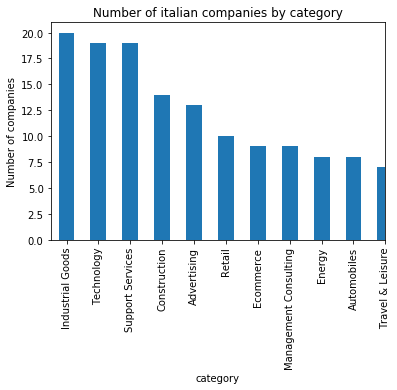

In [10]:
italianCompanies =  companyRates_df['countries']=="Italy"
italianCompanies_df = companyRates_df[italianCompanies]

category_type = pd.value_counts(italianCompanies_df['categories'].values, sort=True)

ax = category_type.plot(kind='bar', title='Number of italian companies by category')
ax.set(xlabel='category', ylabel='Number of companies')
plt.xlim(right=10)
plt.show()

In [11]:
mean_vals = companyRates_df.groupby("categories").numberOfEmployees.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

categories
Travel & Leisure      228.555556
Support Services      220.685393
Games industry        143.153846
Health                133.944444
Fintech               125.730769
Ecommerce             119.363636
Energy                115.777778
Food & Beverage       113.033333
Financial Services     98.911765
Batteries              98.500000
Name: numberOfEmployees, dtype: float64


In [12]:
mean_vals = companyRates_df.groupby("categories").absoluteGrowthRates.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

categories
 Sales & Marketing            5853.500000
Games industry                1517.030769
Personal & Household Goods    1243.380000
Fintech                       1130.207692
Ecommerce                     1047.228889
Energy                         901.950000
Technology                     805.050532
Travel & Leisure               787.840741
Food & Beverage                772.600000
Media                          746.077273
Name: absoluteGrowthRates, dtype: float64


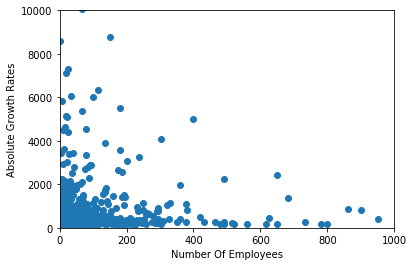

In [13]:
plt.scatter(companyRates_df.numberOfEmployees, companyRates_df.absoluteGrowthRates)
plt.axis([0, 1000, 0, 10000])
plt.xlabel('Number Of Employees')
plt.ylabel('Absolute Growth Rates')

plt.show()

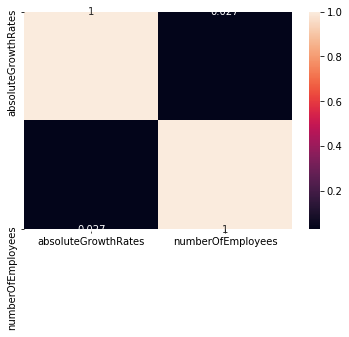

In [14]:
Var_Corr = companyRates_df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)